# Matplotlib

In this short lesson, first we see the most important(and powerful) visualization of python, __Matplotlib__.
Born in 2003, __Matplotlib__ originally was created to emulate the MATLAB environment. Today this huge library(with more than 70000 lines of code) is maintained by the Python community (To have an idea, take a look at its [gallery](https://matplotlib.org/3.1.1/gallery/index.html)). Due to its size and complexity, it's impossible to even mention all the possibilities __Matplotlib__ offers you. 

[Here](https://realpython.com/python-matplotlib-guide/) you can find a nice article about Matplotlib. 

In this lesson, we will see together the following:
- An already done figure with a somehow complex structure
- A step by step guide to create it from 0
- A quick overview of other visualization tools you can use instead of Matplotlib

Let's import the necessary libraries and set some global parameters

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

Here we use the famous __bike sharing__ dataset. To make things simpler we only use the following columns from this dataset: 
- __dteday__: date
- __hum__: Normalized humidity. The values are divided to 100 (max) 
- __atemp__: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale) 

You can learn more about this dataset [here](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset)

In [3]:
df = pd.read_csv('data/Bike-Sharing-Dataset/day.csv',
                 sep=',',
                 parse_dates=['dteday'])

In [4]:
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


Here you see the final plot we're going to make together:

<img src="images/all_final.png" height="900" >

## Anatomy of a plot

Each plot in Matplotlib has three main components:
1. Figure
2. Axes
3. Axis

There are also different items you can add to each plot. these items are identified which a black circle in the following image:

<img src="images/matplotlib.png"  width="500">

## Histogram

Here we reconstruct the histogram you see in the plot above from scratch. starting from the basic form, we add required pieces to arrive to the desired plot.

<img src="Images/histogram_final.png" height="300" width="700">

Basic histogram plot:

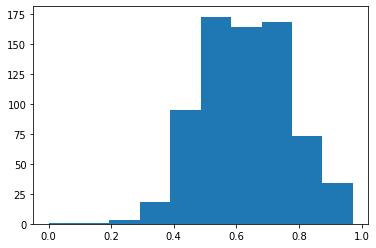

In [5]:
plt.hist(df.hum)
plt.show()

Changing the size:

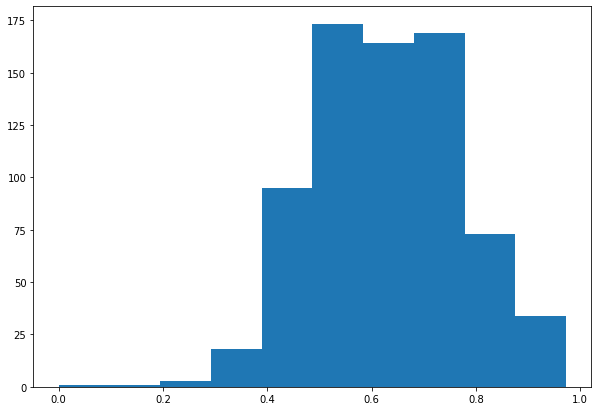

In [6]:
plt.figure(figsize=(10, 7))
plt.hist(df.hum)
plt.show()

Here we do these modifications:
- Changing number of bins from default value to 50
- Changing the color opaqueness from 1 to 0.3
- Setting black as the edge color
- Setting width of the border lines


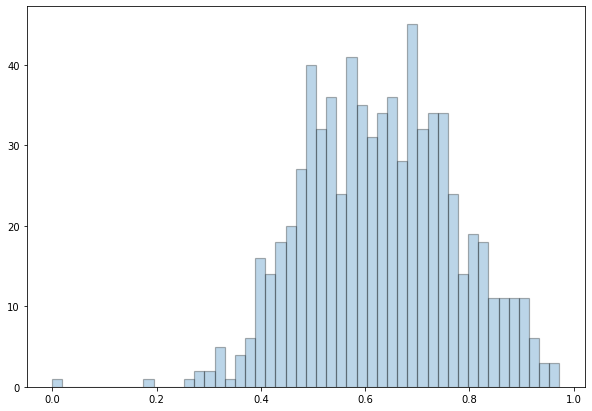

In [7]:
plt.figure(figsize=(10, 7))
plt.hist(df.hum, bins=50, alpha=0.3, edgecolor='black', linewidth=1.2)
plt.show()

Adding a title with the desired size and removing _Y_ ticks

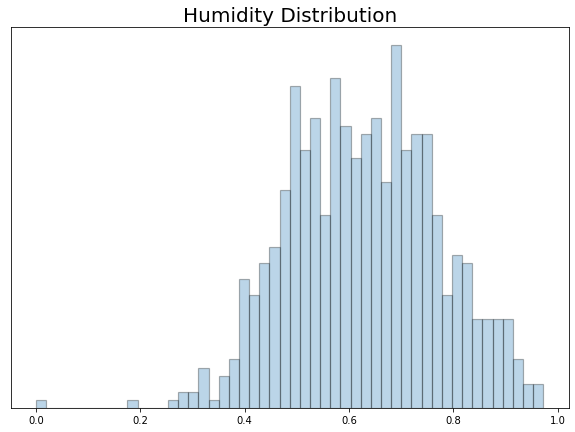

In [8]:
plt.figure(figsize=(10, 7))
plt.hist(df.hum, bins=50, alpha=0.3, edgecolor='black', linewidth=1.2)
plt.title('Humidity Distribution', fontsize=20)
plt.yticks([])
plt.show()

Adding a vertical blue line which indicates the mean of the data:

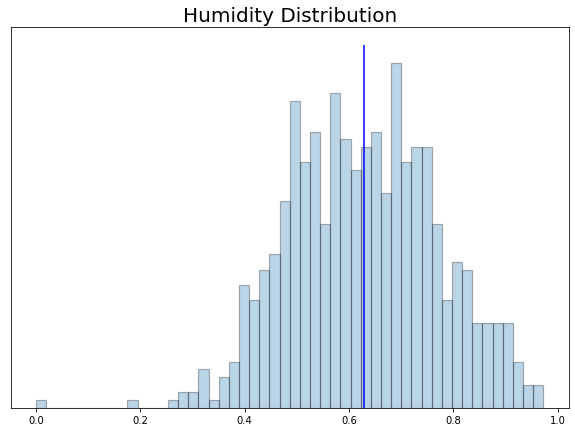

In [9]:
plt.figure(figsize=(10, 7))
plt.hist(df.hum, bins=50, alpha=0.3, edgecolor='black', linewidth=1.2)
plt.title('Humidity Distribution', fontsize=20)
xmin, xmax, ymin, ymax = plt.axis()
plt.vlines(np.mean(df.hum), 0, ymax, 'b')
plt.yticks([])
plt.show()

Adding a text with a specific font, color and size to the plot:

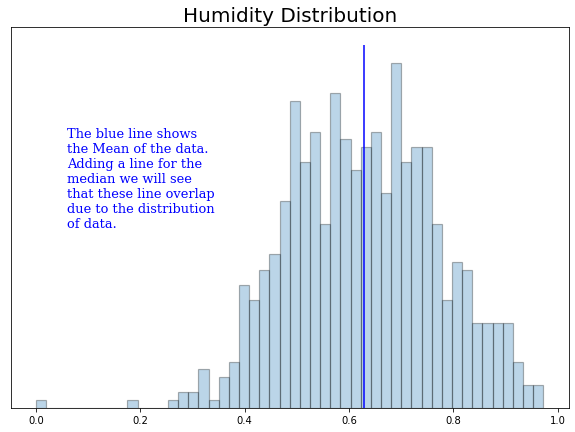

In [10]:
plt.figure(figsize=(10, 7))
plt.hist(df.hum, bins=50, alpha=0.3, edgecolor='black', linewidth=1.2)
plt.title('Humidity Distribution', fontsize=20)
xmin, xmax, ymin, ymax = plt.axis()
plt.vlines(np.mean(df.hum), 0, ymax, 'b')
font = {'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 13,
        }
plt.text(0.06, ymax*0.5, 'The blue line shows\nthe Mean of the data.\nAdding a line for the\nmedian we will see\nthat these line overlap\ndue to the distribution\nof data.',
         fontdict=font)
plt.yticks([])
plt.show()

## Scatter plot

While in the previous case, we started from the basic for of the plot, here we use what we already learned in the previous section:
- Changing the size
- Adding a title
- Adding a vertical line
- Adding a text

<img src="Images/scatter_final.png" height="300" width="700">

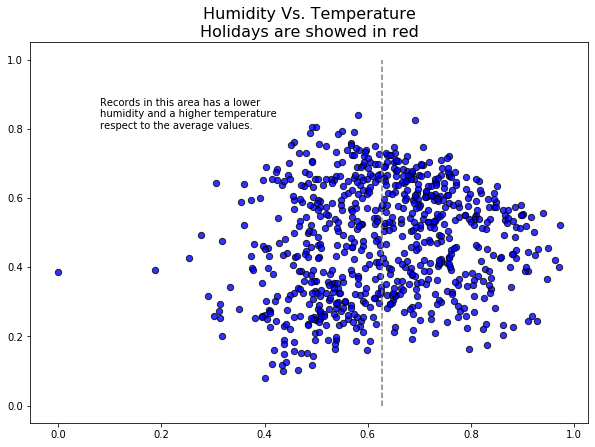

In [11]:
plt.figure(figsize=(10, 7))

plt.scatter(df.hum , df.atemp, c='b', alpha=0.8, edgecolors='k', s=40)
    
plt.title('Humidity Vs. Temperature\nHolidays are showed in red', fontsize=16)
plt.vlines(np.mean(df.hum), 0, 1, 'grey',linestyles='--')
plt.text(0.08, 0.8, 'Records in this area has a lower\nhumidity and a higher temperature\nrespect to the average values.')
plt.show()

Here we these new things:
- Adding X label
- Adding Y label
- Adding a horizontal line

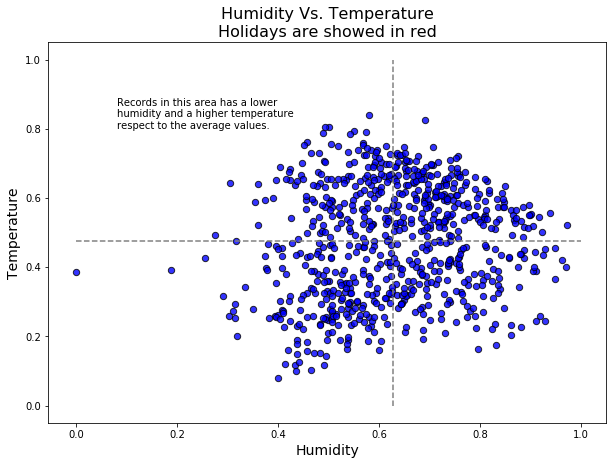

In [12]:
plt.figure(figsize=(10, 7))

plt.scatter(df.hum , df.atemp, c='b', alpha=0.8, edgecolors='k', s=40)
    
plt.title('Humidity Vs. Temperature\nHolidays are showed in red', fontsize=16)
plt.xlabel('Humidity', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.hlines(np.mean(df.atemp), 0, 1, 'grey',linestyles='--')
plt.vlines(np.mean(df.hum), 0, 1, 'grey',linestyles='--')
plt.text(0.08, 0.8, 'Records in this area has a lower\nhumidity and a higher temperature\nrespect to the average values.')
plt.show()

Defining X and Y limits:

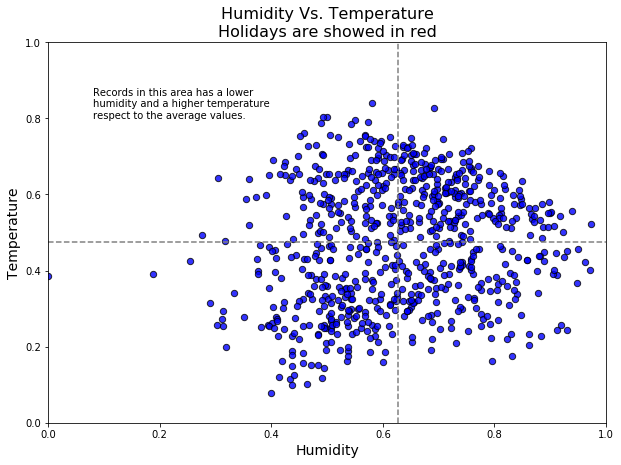

In [13]:
plt.figure(figsize=(10, 7))

plt.scatter(df.hum , df.atemp, c='b', alpha=0.8, edgecolors='k', s=40)
    
plt.title('Humidity Vs. Temperature\nHolidays are showed in red', fontsize=16)
plt.xlabel('Humidity', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.hlines(np.mean(df.atemp), 0, 1, 'grey',linestyles='--')
plt.vlines(np.mean(df.hum), 0, 1, 'grey',linestyles='--')
plt.text(0.08, 0.8, 'Records in this area has a lower\nhumidity and a higher temperature\nrespect to the average values.')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

Here we want to further modify the scatter plot by changing circle styles based on some conditions:
- color: red, alpha: 0.8 and size: 40 if the record is a holiday
- color: blue, alpha: 0.3 and size: 28 if the record is NOT a holiday
- color: green , alpha: 0.3 and size: 28 if s non holiday point has hum less than average and atemp higher than the average




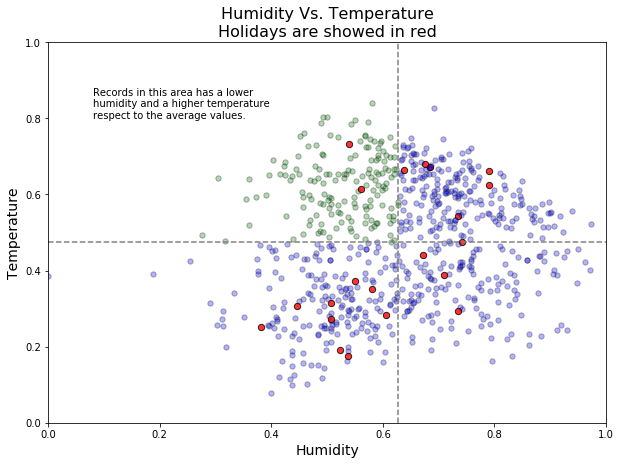

In [14]:
plt.figure(figsize=(10, 7))

for i in range(len(df)):
    if df.holiday[i] == 0:
        # if it's not holiday
        alpha = 0.3
        size = 28
        
        # checking for the green area
        if df.hum[i] < np.mean(df.hum) and  df.atemp[i] > np.mean(df.atemp):
            c = 'g'
        else:
            c = 'b'
    else:
        # in case of holiday
        c = 'r'
        alpha = 0.8
        size = 40
    plt.scatter(df.hum[i] , df.atemp[i], c=c, alpha=alpha, edgecolors='k', s=size)
    
plt.title('Humidity Vs. Temperature\nHolidays are showed in red', fontsize=16)
plt.xlabel('Humidity', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.hlines(np.mean(df.atemp), 0, 1, 'grey',linestyles='--')
plt.vlines(np.mean(df.hum), 0, 1, 'grey',linestyles='--')
plt.text(0.08, 0.8, 'Records in this area has a lower\nhumidity and a higher temperature\nrespect to the average values.')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

## Time-Series (line plot)

Here we wan to plot the historical changes in the felt temperature from 2011 to 2013, considering the following requirements:

- A basic line plot that shows the changes in the temperature 
- Each day should be also indicated by a blue circle (size:10, alpha: 0.2)
- Outlier days should be indicated by red circles (size:23, alpha: 1)
- Add a blue line that shows the rolling average (for 30 days) of temperature data
- For each outlier day, add a red line with a height equal to 0.05

<img src="Images/TS_final.png" width="1000">

In [15]:
def is_outlier(i):
    a = df.atemp[i] < np.mean(df.atemp[i-3: i+4]) * 0.65
    b = df.atemp[i] > np.mean(df.atemp[i-3: i+4]) * 1.4
    return  a or b

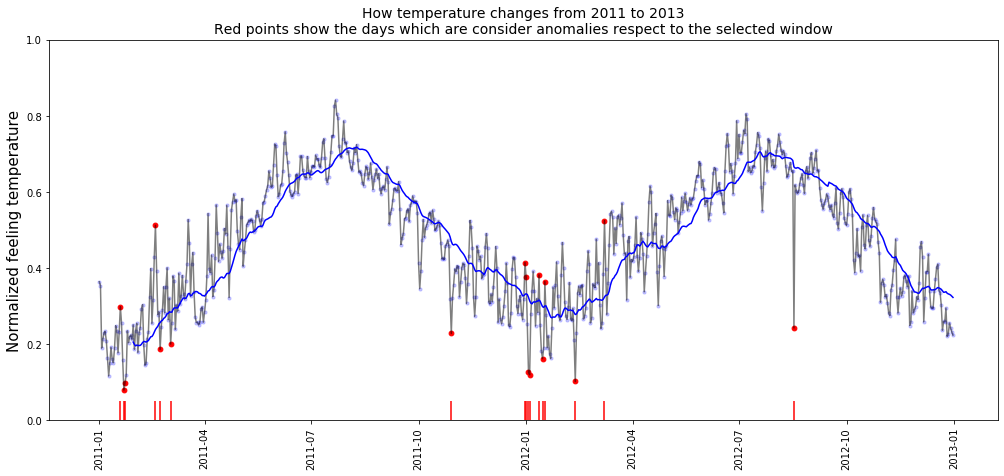

In [16]:
plt.figure(figsize=(17, 7))

for i in range(len(df)):
    if i in list(range(3)) + list(range(len(df), len(df)-3, -1)):
        col = 'b'
        size = 10
        alpha = 0.2
    if is_outlier(i):
        col = 'r'
        size = 23
        alpha = 1
        # plotting rugs
        plt.vlines(df.dteday[i], 0, 0.05, 'r')
    else:
        col = 'b'
        size = 10
        alpha = 0.2
    plt.scatter(df.dteday[i], df.atemp[i], c=col, alpha=alpha, s=size)
    
    
# plotting the main plot
plt.plot(df.dteday, df.atemp, color='k', alpha=0.5)

# plotting the moving average
# creating a moving average for 1 month
df['roll_avg'] = df.atemp.rolling(window=30).mean()
plt.plot(df.dteday, df.roll_avg, color='blue')



plt.title('How temperature changes from 2011 to 2013\nRed points show the days which are consider anomalies respect to the selected window',
         fontsize=14)

# rotating the x labels
plt.xticks(rotation=90)

plt.ylim(0, 1)
plt.ylabel('Normalized feeling temperature', fontsize=15)
plt.show()

## Subplots

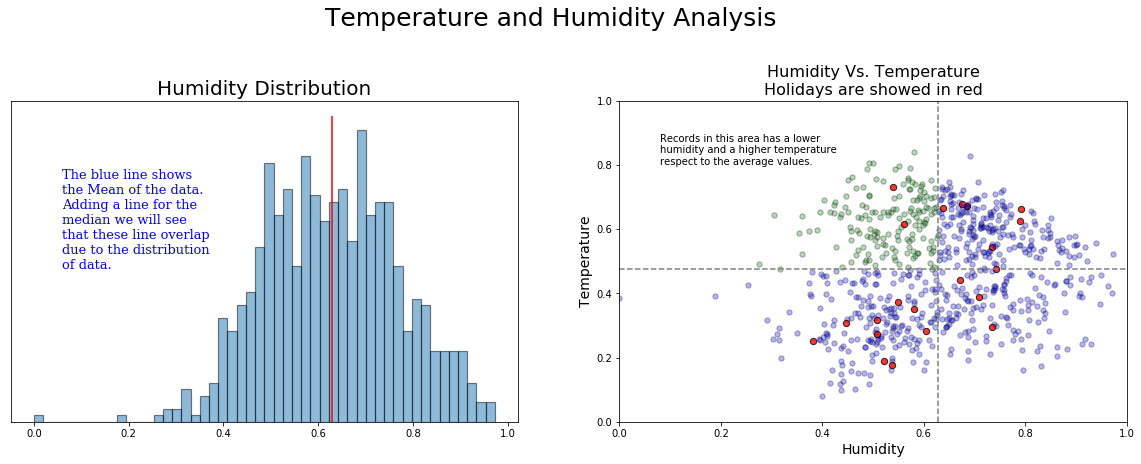

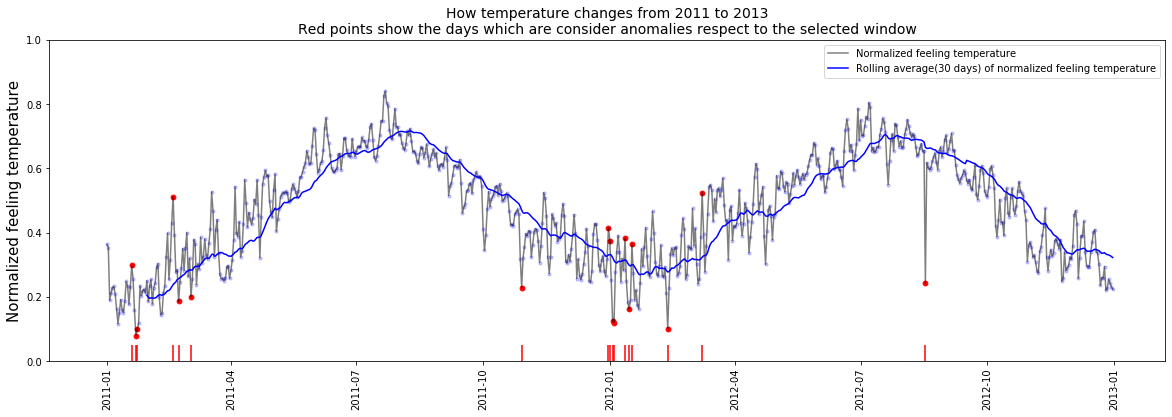

In [17]:
plt.figure(figsize=(20, 13))
plt.suptitle('Temperature and Humidity Analysis', fontsize=25)


plt.subplot(221)
plt.hist(df.hum, bins=50, alpha=0.5, edgecolor='black', linewidth=1.2)
plt.title('Humidity Distribution', fontsize=20)
xmin, xmax, ymin, ymax = plt.axis()
#plt.vlines(np.median(df.hum), 0, ymax, 'r')
plt.vlines(np.mean(df.hum), 0, ymax, 'r')
font = {'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 13,
        }
plt.text(0.06, ymax*0.5, 'The blue line shows\nthe Mean of the data.\nAdding a line for the\nmedian we will see\nthat these line overlap\ndue to the distribution\nof data.',
        fontdict=font)
#plt.text(np.median(df.hum)*1.02, ymax, 'Median value', fontdict=font)
plt.yticks([])





plt.subplot(222)
#plt.figure(figsize=(10, 7))

for i in range(len(df)):
    if df.holiday[i] == 0:
        # if it's not holiday
        alpha = 0.3
        size = 28

        # checking for the green area
        if df.hum[i] < np.mean(df.hum) and  df.atemp[i] > np.mean(df.atemp):
            c = 'g'
        else:
            c = 'b'
    else:
        # in case of holiday
        c = 'r'
        alpha = 0.8
        size = 40
    plt.scatter(df.hum[i] , df.atemp[i], c=c, alpha=alpha, edgecolors='k', s=size)

plt.title('Humidity Vs. Temperature\nHolidays are showed in red', fontsize=16)
plt.xlabel('Humidity', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.hlines(np.mean(df.atemp), 0, 1, 'grey',linestyles='--')
plt.vlines(np.mean(df.hum), 0, 1, 'grey',linestyles='--')
plt.text(0.08, 0.8, 'Records in this area has a lower\nhumidity and a higher temperature\nrespect to the average values.')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()


plt.figure(figsize=(20, 13))

plt.subplot(212)

for i in range(len(df)):
    if i in list(range(3)) + list(range(len(df), len(df)-3, -1)):
        col = 'b'
        size = 10
        alpha = 0.2
    if df.atemp[i] < np.mean(df.atemp[i-3: i+4]) * 0.65 or df.atemp[i] > np.mean(df.atemp[i-3: i+4]) * 1.4:
        col = 'r'
        size = 23
        alpha = 1
        plt.vlines(df.dteday[i], 0, 0.05, 'r')
    else:
        col = 'b'
        size = 10
        alpha = 0.2
    plt.scatter(df.dteday[i], df.atemp[i], c=col, alpha=alpha, s=size)




plt.plot(df.dteday, df.atemp, color='k', alpha=0.5, label='Normalized feeling temperature')

# plotting the moving average
# creating a moving average for 1 month
df['roll_avg'] = df.atemp.rolling(window=30).mean()
plt.plot(df.dteday, df.roll_avg, color='blue', label='Rolling average(30 days) of normalized feeling temperature')





plt.title('How temperature changes from 2011 to 2013\nRed points show the days which are consider anomalies respect to the selected window',
        fontsize=14)
plt.xticks(rotation=90)

plt.ylim(0, 1)
plt.ylabel('Normalized feeling temperature', fontsize=15)
plt.legend()
plt.show()

# Seaborn

Seaborn is a library for making statistical graphics in Python. It is built on top of matplotlib and closely integrated with pandas data structures.Being built _on top of Matplotlib_ means it's less flexible/powerful than it's parent but in the same time, it means gives you the possibility to generate graphics easier and faster. Take a look at the [seaborn gallery](https://seaborn.pydata.org/examples/index.html). Just like Matplotlib gallery, each example has an example code which you can modify to generate the same graphic with your own data.

Let's start by importing seaborn as setting the general style. Learn more about available styles [here](https://seaborn.pydata.org/tutorial/aesthetics.html)

In [18]:
import seaborn as sns
sns.set(style="ticks")

In this section we use the super-famous _iris_ dataset which comes with the seaborn. Learn about other datasets you can find in the seaborn [here](https://github.com/mwaskom/seaborn-data) 

In [19]:
iris = sns.load_dataset("iris")
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
144,6.7,3.3,5.7,2.5,virginica
1,4.9,3.0,1.4,0.2,setosa
93,5.0,2.3,3.3,1.0,versicolor
96,5.7,2.9,4.2,1.3,versicolor
105,7.6,3.0,6.6,2.1,virginica
125,7.2,3.2,6.0,1.8,virginica
87,6.3,2.3,4.4,1.3,versicolor
108,6.7,2.5,5.8,1.8,virginica
118,7.7,2.6,6.9,2.3,virginica
68,6.2,2.2,4.5,1.5,versicolor


The following graphic is called _pairplot_ ans as you can see, Seaborn let you generate it just with one line of code!

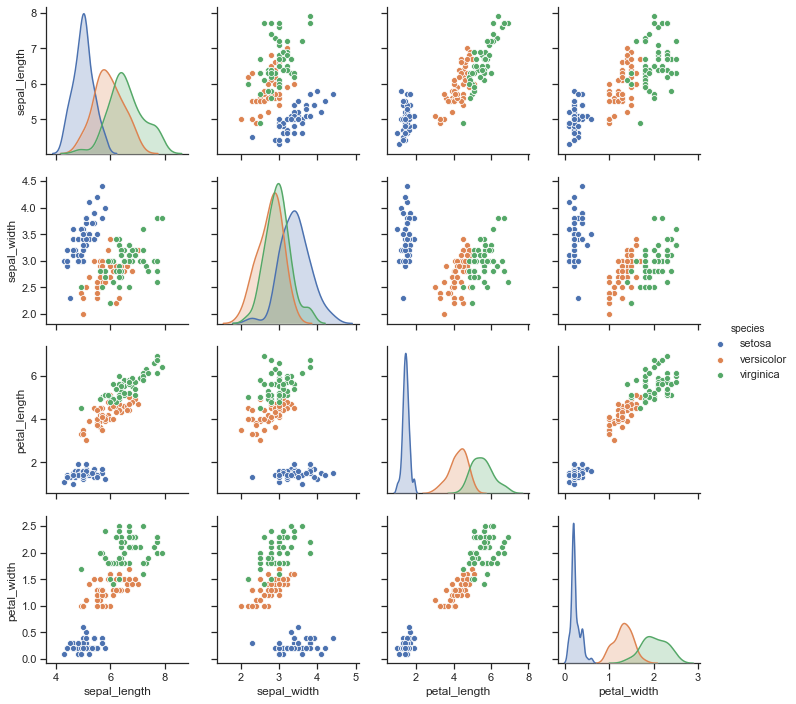

In [20]:
sns.pairplot(iris, hue="species")

Next, we generate some random data to make a _joinplot_. (Again you see that it needs just one line of code)

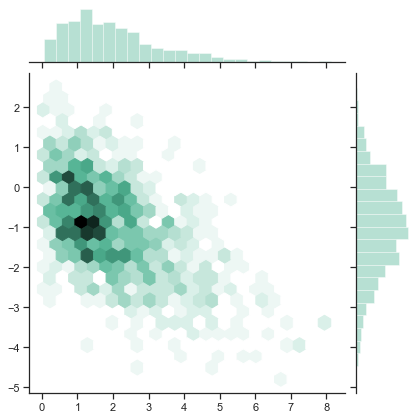

In [40]:
# generating random data
rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)

# creating the plot
sns.jointplot(x, y, kind="hex", color="#4CB391")

# Bokeh

The last library we see is Bokeh which is mostly used when _interactivity_ is needed (the thing that is almost missing in Matplotlib and Seaborn). The way Bokeh plots are created is a bit different from the previous libraries we saw. In [Bokeh gallery] you'll find examples of both stand-alone and server based examples.

In [21]:
import numpy as np
import bokeh.io
from bokeh.io import output_file, show
from bokeh.models import HoverTool
from bokeh.plotting import figure

#bokeh.io.reset_output()
bokeh.io.output_notebook()

n = 500
x = 2 + 2*np.random.standard_normal(n)
y = 2 + 2*np.random.standard_normal(n)

p = figure(title="Hexbin for 500 points", match_aspect=True,
           tools="wheel_zoom,reset", background_fill_color='#440154')
p.grid.visible = False

r, bins = p.hexbin(x, y, size=0.5, hover_color="pink", hover_alpha=0.8)

p.circle(x, y, color="white", size=1)

p.add_tools(HoverTool(
    tooltips=[("count", "@c"), ("(q,r)", "(@q, @r)")],
    mode="mouse", point_policy="follow_mouse", renderers=[r]
))

#output_file("hexbin.html")

show(p, notebook_handle=True)

Loading BokehJS ...

The following line of code starts a local server:

In [22]:
!bokeh serve selection_histogram.py

2020-07-06 10:05:04,655 Starting Bokeh server version 1.3.4 (running on Tornado 6.0.3)
2020-07-06 10:05:04,691 Bokeh app running at: http://localhost:5006/selection_histogram
2020-07-06 10:05:04,691 Starting Bokeh server with process id: 8344
^C

Interrupted, shutting down


We can see the result here:

http://localhost:5006/selection_histogram

# Other libraries

In the recent years various visualization libraries are born concentrating more on the interactivity features rather than providing a fully customizable tool like Matplotlib. Two of the most famous tools are Plotly and Dash(built on Plotly)

## Plotly

Another interactive visualization library which supports a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases. Take a look at the gallery [here](https://plotly.com/python/)

## Dash

Dash was the first attemp of Python community to provide an interactive dashboard. (_R_ language has the same tool called [Shiny](https://shiny.rstudio.com/)).

Written on top of Flask, Plotly.js, and React.js, Dash is ideal for building data visualization apps with highly custom user interfaces in pure Python.

Here is an example which is created using Dash:

https://dash.vaex.io/